In [1]:
import pandas as pd

df_victims = pd.read_csv("total_victims_globally.csv")

display(df_victims)

,Country_name,Total_Victims,Percentage_of_World_Total
0,Pakistan,545237,15.90
1,United States of America,543253,15.84
2,United Kingdom of Great Britain and Northern I...,392854,11.46
3,India,229290,6.69
4,Nigeria,116537,3.40
5,Netherlands (Kingdom of the),101258,2.95
6,France,84483,2.46
7,Romania,83941,2.45
8,Germany,73145,2.13
9,Argentina,72978,2.13


In [2]:
rename_dict = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Netherlands (Kingdom of the)": "Netherlands",  # Sin el tabulador
}

df_victims["Country_name"] = df_victims["Country_name"].replace(rename_dict)

In [3]:
df_victims["Country_name"] = df_victims["Country_name"].replace({
    r"Netherlands \(Kingdom of the\)\s*": "Netherlands",
}, regex=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_victims_sorted = df_victims.sort_values(by="Total_Victims", ascending=True)

In [6]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

<Figure size 1200x1000 with 0 Axes>

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22432\2338842332.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


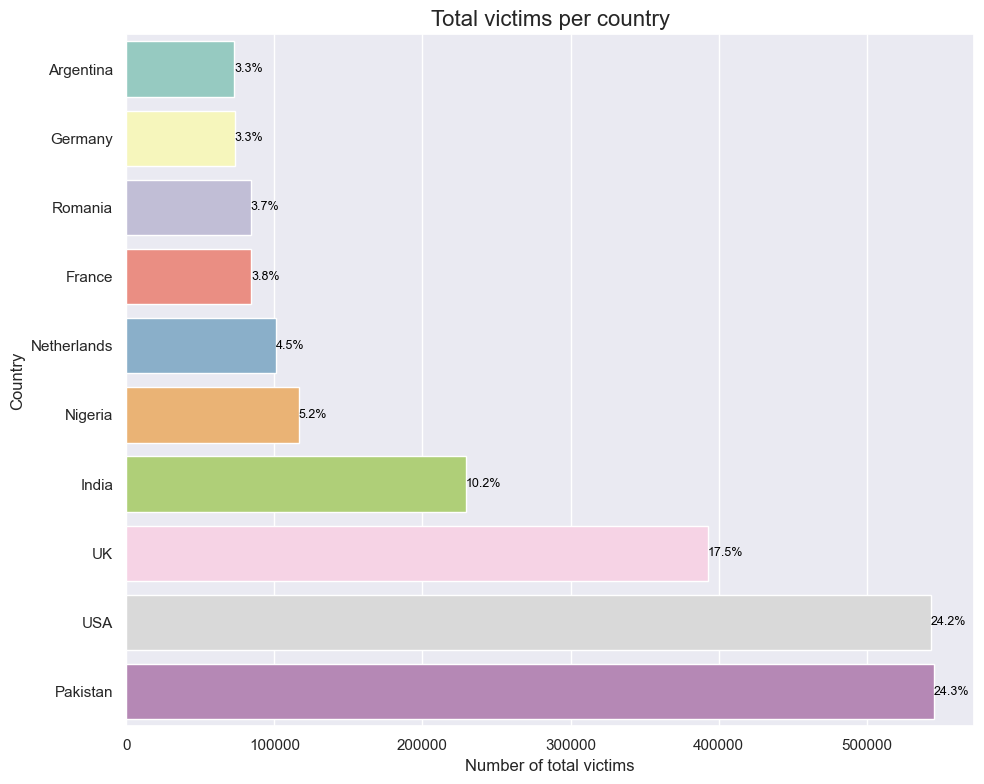

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener tus datos ordenados
df_victims_sorted = df_victims.sort_values(by="Total_Victims", ascending=True)

# Calcular porcentaje respecto al total
total_victims = df_victims_sorted["Total_Victims"].sum()
df_victims_sorted["Percentage"] = df_victims_sorted["Total_Victims"] / total_victims * 100

# Crear el gráfico
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=df_victims_sorted,
    y="Country_name",
    x="Total_Victims",
    palette="Set3"
)

# Añadir los porcentajes como etiquetas
for i, (value, percent) in enumerate(zip(df_victims_sorted["Total_Victims"], df_victims_sorted["Percentage"])):
    ax.text(
        value,                      # posición x
        i,                          # posición y (índice del país)
        f"{percent:.1f}%",          # texto
        va='center',                # vertical alignment
        ha='left',                  # horizontal alignment
        fontsize=9,
        color='black'
    )

# Etiquetas y formato
plt.title("Total victims per country", fontsize=16)
plt.xlabel("Number of total victims")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [8]:
rename_dict = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK"
}

df_victims["Country_name"] = df_victims["Country_name"].replace(rename_dict)

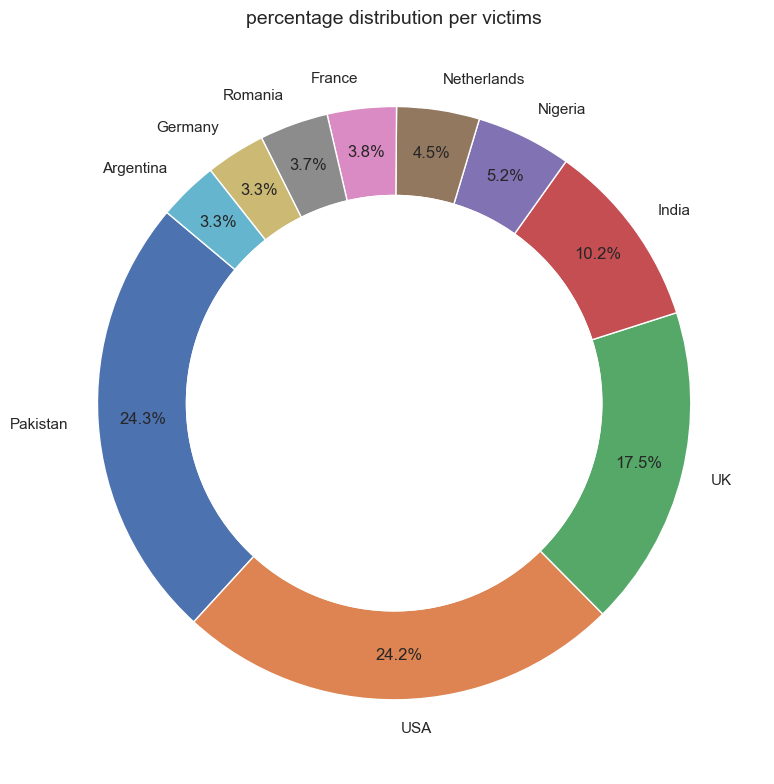

In [9]:
import matplotlib.pyplot as plt

# Opcional: mostrar solo los países con % mayor a cierto umbral (p.ej. > 1%)
df_filtered = df_victims[df_victims["Percentage_of_World_Total"] > 1].copy()


labels = df_filtered["Country_name"]
sizes = df_filtered["Percentage_of_World_Total"]


fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3),  # Hace el "agujero" central
    pctdistance=0.85
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


plt.title("percentage distribution per victims", fontsize=14)
plt.tight_layout()
plt.show()

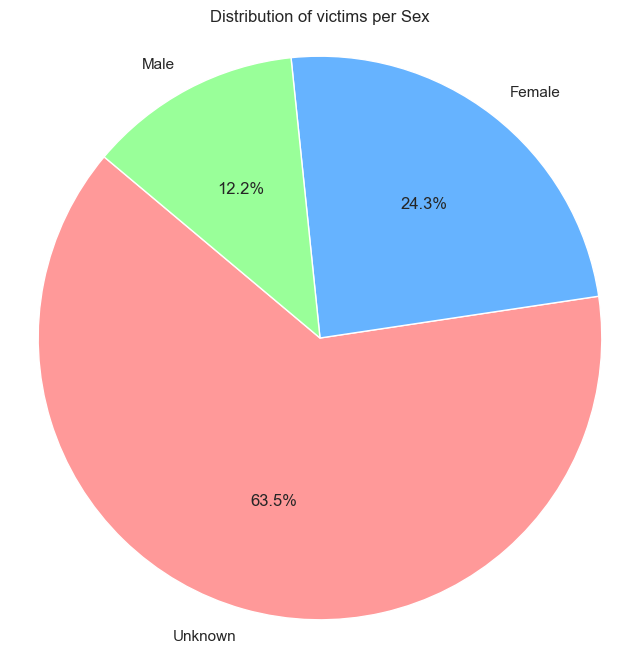

In [10]:
df_gender = pd.read_csv("total_victims_globally_gender.csv")

import matplotlib.pyplot as plt

# Asegúrate de que los nombres de columna coincidan con los reales
labels = df_gender['Sex']
sizes = df_gender['Global_Percentage']

# Colores personalizados (puedes cambiarlos)
colors = ['#ff9999','#66b3ff','#99ff99']

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of victims per Sex")
plt.axis('equal')  # Igual proporción para que sea un círculo
plt.show()

In [11]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("top_global_crimes.csv")

# Ver primeras filas y nombres de columnas
print(df.columns)
df.head()

Index(['Category', 'Percentage_of_Global'], dtype='object')


,Category,Percentage_of_Global
0,Unknown,61.10
1,Sexual exploitation,12.60
2,Forced labour,7.82
3,Other forms of exploitation,5.74


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22432\722939069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


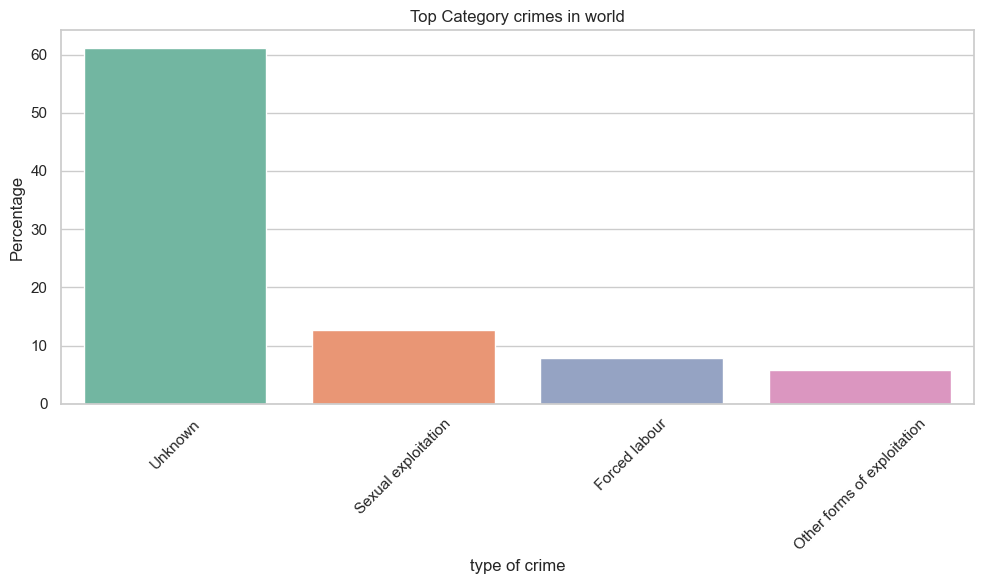

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Category",       # Cambia esto si el nombre de columna es diferente
    y="Percentage_of_Global",  # Cambia esto si usas otra métrica, como 'Victims'
    palette="Set2"   # Cambia la paleta si deseas otros colores
)

plt.title("Top Category crimes in world")
plt.ylabel("Percentage")
plt.xlabel("type of crime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

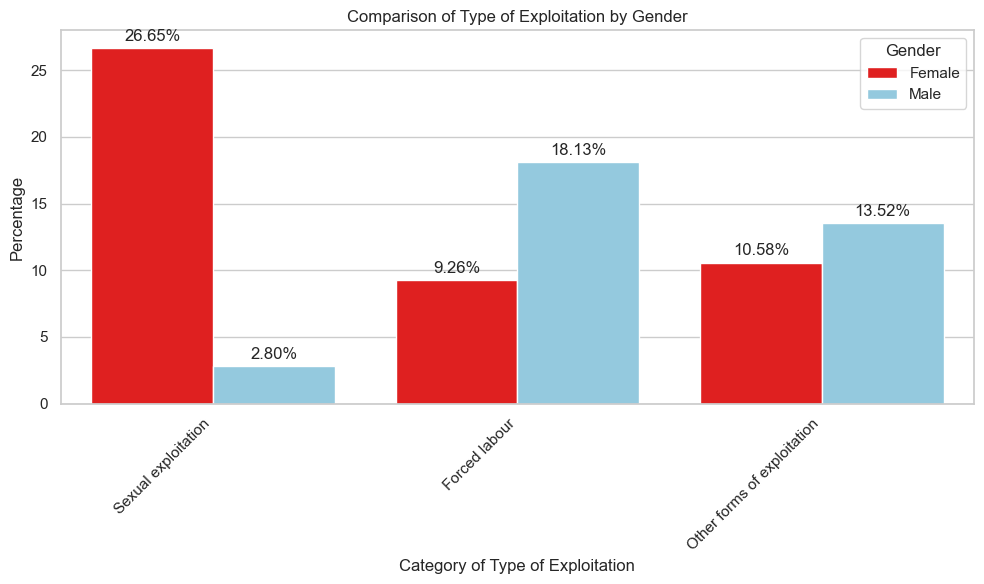

In [15]:

df = pd.read_csv("sex_analysis_global.csv")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))


ax = sns.barplot(
    data=df,
    x='Category',
    y='Percentage',
    hue='Sex',
    palette={'Male': 'skyblue', 'Female': 'red'}
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)


plt.title("Comparison of Type of Exploitation by Gender")
plt.ylabel("Percentage")
plt.xlabel("Category of Type of Exploitation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Gender")
plt.show()

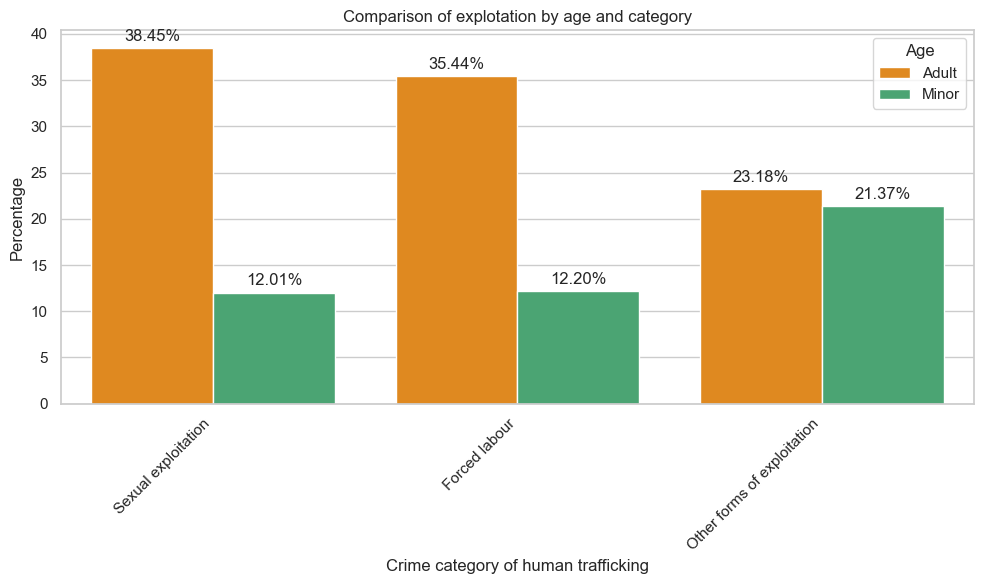

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("age_analysis_global.csv")


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x='Category',
    y='Percentage',
    hue='Age',
    palette={'Adult': 'darkorange', 'Minor': 'mediumseagreen'}
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)


plt.title("Comparison of explotation by age and category")
plt.ylabel("Percentage")
plt.xlabel("Crime category of human trafficking")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Age")
plt.show()

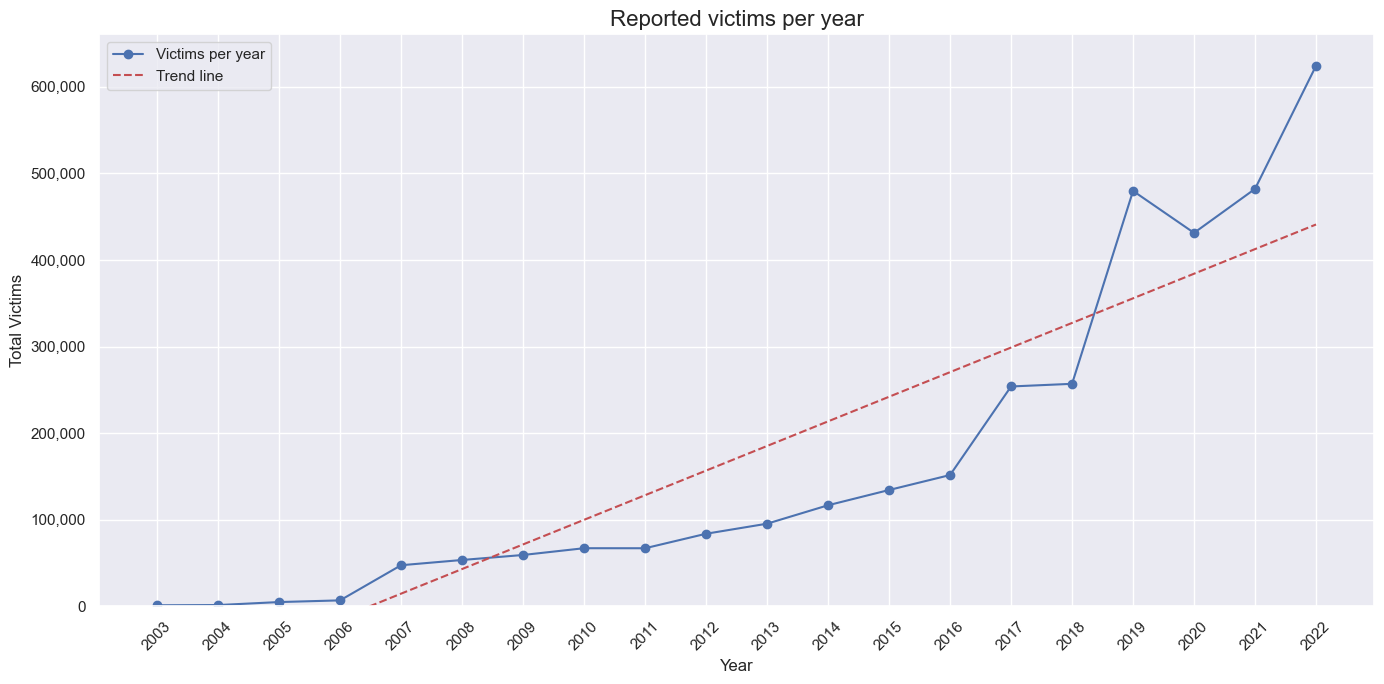

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


df = pd.read_csv("tendencies.csv")


df["Year"] = df["Year"].astype(int)


df = df.sort_values("Year")


plt.figure(figsize=(14, 7))


plt.plot(df["Year"], df["Total_victims"], marker='o', label="Victims per year")


z = np.polyfit(df["Year"], df["Total_victims"], 1)
p = np.poly1d(z)
trend = p(df["Year"])
plt.plot(df["Year"], trend, "r--", label="Trend line")


plt.ylim(bottom=0)


formatter = FuncFormatter(lambda x, _: f"{int(x):,}")
plt.gca().yaxis.set_major_formatter(formatter)


plt.title("Reported victims per year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Victims")
plt.xticks(df["Year"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

